In [1]:
import tensorflow as tf

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#DATA PREPROCESSING

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/shaik/OneDrive/Documents/Dataset_CNN/training_set/training_set',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary')

Found 8005 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'C:/Users/shaik/OneDrive/Documents/Dataset_CNN/test_set/test_set',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary')

Found 2023 images belonging to 2 classes.


In [6]:
#BUILD CNN MODEL
#INITIALIZE

In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
#CONVOLUTION

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))

In [10]:
#POOLING

In [11]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [12]:
#ADD 1 MORE LAYER

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [14]:
#FLATTEN

In [15]:
cnn.add(tf.keras.layers.Flatten())

In [16]:
#FULL CONNECTION

In [17]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [18]:
#OUTPUT LAYER

In [19]:
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [20]:
#COMPILE THE MODEL

In [21]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
#TRAIN THE MODEL

In [23]:
history = cnn.fit(x = train_generator, validation_data = test_generator, epochs = 20)

Epoch 1/20


251/251 [==============================] - 202s 791ms/step - loss: 0.6736 - accuracy: 0.5750 - val_loss: 0.6571 - val_accuracy: 0.6228
Epoch 2/20
251/251 [==============================] - 405s 2s/step - loss: 0.6319 - accuracy: 0.6462 - val_loss: 0.6273 - val_accuracy: 0.6579
Epoch 3/20
251/251 [==============================] - 109s 435ms/step - loss: 0.5892 - accuracy: 0.6859 - val_loss: 0.5789 - val_accuracy: 0.6995
Epoch 4/20
251/251 [==============================] - 231s 922ms/step - loss: 0.5463 - accuracy: 0.7164 - val_loss: 0.5154 - val_accuracy: 0.7469
Epoch 5/20
251/251 [==============================] - 85s 337ms/step - loss: 0.5148 - accuracy: 0.7502 - val_loss: 0.5301 - val_accuracy: 0.7390
Epoch 6/20
251/251 [==============================] - 92s 368ms/step - loss: 0.4939 - accuracy: 0.7568 - val_loss: 0.5156 - val_accuracy: 0.7533
Epoch 7/20
251/251 [==============================] - 84s 336ms/step - loss: 0.4725 - accuracy: 0.7706 - val_loss: 0.5890 - val

In [24]:
#MAKE SINGLE PREDICTION

In [26]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("C:/Users/shaik/OneDrive/Documents/Dataset_CNN/single_prediction/cat_test.jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    
prediction    

1/1 [==============================] - 0s 69ms/step


'cat'

In [27]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


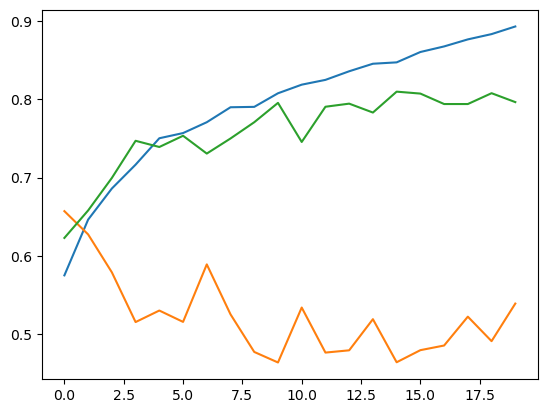

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])